<h1> Prediction Model for the number of deaths due to COVID-19 in Africa </h1>

SANDILE MDUDUZI MCHUNU <p>
MAY20/MIT/037U

Import libaries

In [3]:
import pandas as pd
import numpy as np

In [4]:
path='WHO COVID-19 global table data June 27th 2021 at 4.32.12 PM.csv'
global_df = pd.read_csv(path)

In [5]:
global_df.dtypes

Name                                                             object
WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
Transmission Classification                                      object
dtype: object

In [6]:
global_df['WHO Region'].value_counts().to_frame()

,WHO Region
Europe,62
Americas,56
Africa,50
Western Pacific,35
Eastern Mediterranean,22
South-East Asia,11
Other,1


In [7]:
africa_df = global_df.loc[(global_df['WHO Region'] == 'Africa')]

In [8]:
africa_df['WHO Region'].value_counts().to_frame()

,WHO Region
Africa,50


In [16]:
africa_df.rename(columns = {'Name':'Country','Cases - cumulative total':'Total_Cases', 
                         'Cases - cumulative total per 100000 population':'Total_Cases_per_100000_population', 
                         'Cases - newly reported in last 7 days':'Weekly_Cases', 
                         'Cases - newly reported in last 7 days per 100000 population':'Weekly_Cases_per_100000_population', 
                         'Cases - newly reported in last 24 hours':'Daily_Cases', 
                         'Deaths - cumulative total':'Total_Deaths',
                         'Deaths - cumulative total per 100000 population':'Total_Deaths_per_100000_population', 
                         'Deaths - newly reported in last 7 days':'Weekly_Deaths',
                         'Deaths - newly reported in last 7 days per 100000 population':'Weekly_Deaths_per_100000_population',
                         'Deaths - newly reported in last 24 hours':'Daily_Deaths',
                          'Transmission Classification' : 'Transmission_Classification'
                           }, inplace = True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<b> 
Check the table headers</b>

In [22]:
africa_df.head()

,Country,WHO Region,Total_Cases,Total_Cases_per_100000_population,Weekly_Cases,Weekly_Cases_per_100000_population,Daily_Cases,Total_Deaths,Total_Deaths_per_100000_population,Weekly_Deaths,Weekly_Deaths_per_100000_population,Daily_Deaths,Transmission_Classification
19,South Africa,Africa,1877143,3165.04,91064,153.54,16078,59406,100.16,1083,1.83,148,Community transmission
67,Ethiopia,Africa,275601,239.73,826,0.72,99,4296,3.74,34,0.03,4,Community transmission
81,Kenya,Africa,181239,337.06,3957,7.36,741,3538,6.58,104,0.19,24,Community transmission
83,Nigeria,Africa,167401,81.21,259,0.13,70,2118,1.03,1,0.00,0,Community transmission
87,Zambia,Africa,140620,764.91,18376,99.96,3594,1855,10.09,330,1.80,61,Community transmission


In [23]:
africa_df.tail()

,Country,WHO Region,Total_Cases,Total_Cases_per_100000_population,Weekly_Cases,Weekly_Cases_per_100000_population,Daily_Cases,Total_Deaths,Total_Deaths_per_100000_population,Weekly_Deaths,Weekly_Deaths_per_100000_population,Daily_Deaths,Transmission_Classification
181,Liberia,Africa,3265,64.56,536,10.60,0,110,2.17,15,0.3,0,Community transmission
189,Sao Tome and Principe,Africa,2364,1078.67,5,2.28,1,37,16.88,0,0.0,0,Community transmission
194,Mauritius,Africa,1852,145.62,79,6.21,7,18,1.42,0,0.0,0,Clusters of cases
203,United Republic of Tanzania,Africa,509,0.85,0,0.00,0,21,0.04,0,0.0,0,Pending
233,Saint Helena,Africa,0,0.00,0,0.00,0,0,0.00,0,0.0,0,No cases


In [24]:
africa_df.shape

(50, 13)

<b> Data Analysis</b>

In [38]:
africa_df.describe()

,Total_Cases,Total_Cases_per_100000_population,Weekly_Cases,Weekly_Cases_per_100000_population,Daily_Cases,Total_Deaths,Total_Deaths_per_100000_population,Weekly_Deaths,Weekly_Deaths_per_100000_population,Daily_Deaths
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,7.822606e+04,1060.529800,3215.760000,45.727200,610.260000,1870.3800,12.735600,49.460000,0.533800,8.380000
std,2.653622e+05,2523.380276,13082.564441,155.697475,2367.162193,8358.0771,21.314941,163.081701,1.534344,25.245642
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,6.333500e+03,101.417500,38.750000,0.837500,0.250000,116.2500,1.197500,0.000000,0.000000,0.000000
50%,1.995850e+04,230.955000,243.000000,2.670000,14.000000,255.5000,3.170000,3.000000,0.035000,0.000000
75%,4.712000e+04,505.582500,947.500000,10.495000,102.000000,902.7500,10.315000,18.000000,0.150000,1.000000
max,1.877143e+06,15364.980000,91064.000000,1004.610000,16078.000000,59406.0000,100.160000,1083.000000,7.790000,148.000000


<h2> 1. Pearson Correlations </h2>

Check Correlation of the entire data

In [40]:
africa_df.corr()

,Total_Cases,Total_Cases_per_100000_population,Weekly_Cases,Weekly_Cases_per_100000_population,Daily_Cases,Total_Deaths,Total_Deaths_per_100000_population,Weekly_Deaths,Weekly_Deaths_per_100000_population,Daily_Deaths
Total_Cases,1.000000,0.105260,0.969138,0.099370,0.947494,0.993836,0.575956,0.933022,0.148798,0.830222
Total_Cases_per_100000_population,0.105260,1.000000,0.129520,0.858236,0.146628,0.106699,0.688792,0.120342,0.503043,0.140741
Weekly_Cases,0.969138,0.129520,1.000000,0.157503,0.990264,0.972590,0.606945,0.981895,0.246266,0.909088
Weekly_Cases_per_100000_population,0.099370,0.858236,0.157503,1.000000,0.204192,0.095111,0.516443,0.172471,0.696305,0.266116
Daily_Cases,0.947494,0.146628,0.990264,0.204192,1.000000,0.948781,0.638525,0.984149,0.356110,0.950576
Total_Deaths,0.993836,0.106699,0.972590,0.095111,0.948781,1.000000,0.586248,0.927264,0.132664,0.818021
Total_Deaths_per_100000_population,0.575956,0.688792,0.606945,0.516443,0.638525,0.586248,1.000000,0.596181,0.557328,0.611624
Weekly_Deaths,0.933022,0.120342,0.981895,0.172471,0.984149,0.927264,0.596181,1.000000,0.329794,0.948454
Weekly_Deaths_per_100000_population,0.148798,0.503043,0.246266,0.696305,0.356110,0.132664,0.557328,0.329794,1.000000,0.521511
Daily_Deaths,0.830222,0.140741,0.909088,0.266116,0.950576,0.818021,0.611624,0.948454,0.521511,1.000000


Check Correlation of the entire two variables

In [12]:
africa_df[['Daily_Cases','Weekly_Cases']].corr()

,Daily_Cases,Weekly_Cases
Daily_Cases,1.000000,0.990264
Weekly_Cases,0.990264,1.000000


Looking at the data i found that there is a strong relationship between the Daily_Cases and Weekly_Cases

<b>Hypothesis</b>
1. Null Hypthesis, <b>Ho</b>: Weekly_Deaths are not affected by Daily_Cases

2. Alternative Hypthosesis, <b>H1</b>: Weekly_Deaths are affected by Daily_Cases


<h2>Visualising related variables</h2>

df1: mean=2306.764 stdv=2295.175
df2: mean=2380.145 stdv=2295.844


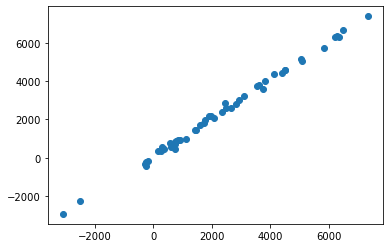

In [9]:
#df1=Daily_Cases,std=2367.162193,mean=610.260000
#df2=Weekly_Death, std=163.081701,mean =49.460000
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
df1 = 2367.162193 * randn(50) + 2367.162193
df2 = df1 + (163.081701 * randn(50) + 49.460000)
# summarize
print('df1: mean=%.3f stdv=%.3f' % (mean(df1), std(df1)))
print('df2: mean=%.3f stdv=%.3f' % (mean(df2), std(df2)))
# plot
pyplot.scatter(df1, df2)

pyplot.show()

covariance of the variables

In [10]:
np. cov(df1, df2)

array([[5375335.4175142 , 5368596.66360723],
       [5368596.66360723, 5378468.6255801 ]])

#The covariance between the two variables is positive, <b>5368596.66360723</b>. suggesting the variables change in the same direction as we expect.

<h2>calculate the Pearson's correlation between two variables</h2>

In [11]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
df1 = 2367.162193 * randn(50) + 2367.162193
df2 = df1 + (163.081701 * randn(50) + 49.460000)
# calculate Pearson's correlation
corr, _ = pearsonr(df1, df2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.998


The two variables are positively correlated and that the correlation is <b>0.998</b>. This suggests a high level of correlation between cases reported daily and deaths reported weekly, given that the value is above 0.5 and close to 1.0.

<h2>Testing Hypothesis</h2>

In [12]:
#import libraries
import scipy.stats

In [13]:
r,p =scipy.stats.pearsonr(df1, df2)
r

0.9984554060985779

In [14]:
p

6.425586190780168e-62

Since the p-value, <b>0.6426</b> is 0.5 then I reject Ho and accept the H1 that Deaths reported weekly are arising from cases reported daily

<h1>Decision tree</h1>

In [37]:
%conda install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
africa_df['Transmission_Classification'].value_counts().to_frame()

,Transmission_Classification
Community transmission,47
Pending,1
Clusters of cases,1
No cases,1


<b>Feature before One Hot Encoding</b>

In [39]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [40]:
africa_df[['Weekly_Deaths','Total_Cases','Weekly_Cases','Daily_Cases', 'Transmission_Classification']].head()

,Weekly_Deaths,Total_Cases,Weekly_Cases,Daily_Cases,Transmission_Classification
19,1083,1877143,91064,16078,Community transmission
67,34,275601,826,99,Community transmission
81,104,181239,3957,741,Community transmission
83,1,167401,259,70,Community transmission
87,330,140620,18376,3594,Community transmission


Use one hot encoding technique to convert categorical varables to binary variables and append them to the training Data

In [41]:
train_africa = africa_df[['Total_Cases','Weekly_Deaths']]
train_africa = pd.concat([train_africa,pd.get_dummies(africa_df['Transmission_Classification'])], axis=1)
train_africa.drop(['No cases'], axis = 1,inplace=True)
train_africa.drop(['Pending'], axis = 1,inplace=True)
#Feature.drop(['Not applicable'], axis = 1,inplace=True)
train_africa.head()

,Total_Cases,Weekly_Deaths,Clusters of cases,Community transmission
19,1877143,1083,0,1
67,275601,34,0,1
81,181239,104,0,1
83,167401,1,0,1
87,140620,330,0,1


<h2> Feature selection</h2>

Lets defind feature sets, X:

In [42]:
X = train_africa
X[0:5]

,Total_Cases,Weekly_Deaths,Clusters of cases,Community transmission
19,1877143,1083,0,1
67,275601,34,0,1
81,181239,104,0,1
83,167401,1,0,1
87,140620,330,0,1


<b>What are our lables?</b>

In [43]:
y = africa_df['Transmission_Classification'].values
y[0:5]

array(['Community transmission', 'Community transmission',
       'Community transmission', 'Community transmission',
       'Community transmission'], dtype=object)

In [44]:
y_collection = africa_df['Transmission_Classification'].replace(to_replace=['Community transmission', 'Clusters of cases','Sporadic cases'], value=[2,1,0]).values
y_collection[0:5]

array([2, 2, 2, 2, 2], dtype=object)


<h2> 
Normalize Data</h2>

Data Standardization give data zero mean and unit variance (technically should be done after train test split

In [45]:
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]

array([[ 6.8479251 ,  6.40190195, -0.14285714,  0.25264558],
       [ 0.75134587, -0.09576156, -0.14285714,  0.25264558],
       [ 0.39213867,  0.33782895, -0.14285714,  0.25264558],
       [ 0.33946165, -0.30016852, -0.14285714,  0.25264558],
       [ 0.23751459,  1.73770689, -0.14285714,  0.25264558],
       [ 0.22526846,  0.09006294, -0.14285714,  0.25264558],
       [ 0.06483918, -0.28158607, -0.14285714,  0.25264558],
       [ 0.01158735,  0.92007906, -0.14285714,  0.25264558],
       [ 0.00860671, -0.24442117, -0.14285714,  0.25264558],
       [-0.01023643,  1.17403922, -0.14285714,  0.25264558]])

<b> Import libraries</b>

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%conda install six
%conda install pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
%conda install graphviz
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<b> 
Build an empty DecisionTree object with depth 5</b>

In [50]:
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 6.8479251 ,  6.40190195, -0.14285714,  0.25264558],
       [ 0.75134587, -0.09576156, -0.14285714,  0.25264558],
       [ 0.39213867,  0.33782895, -0.14285714,  0.25264558],
       [ 0.33946165, -0.30016852, -0.14285714,  0.25264558],
       [ 0.23751459,  1.73770689, -0.14285714,  0.25264558]])

<b> Train the decision tree using the global X data set.</b>

In [52]:
CovidTree.fit(X_initial, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

<b> Print the Decision Tree</b>

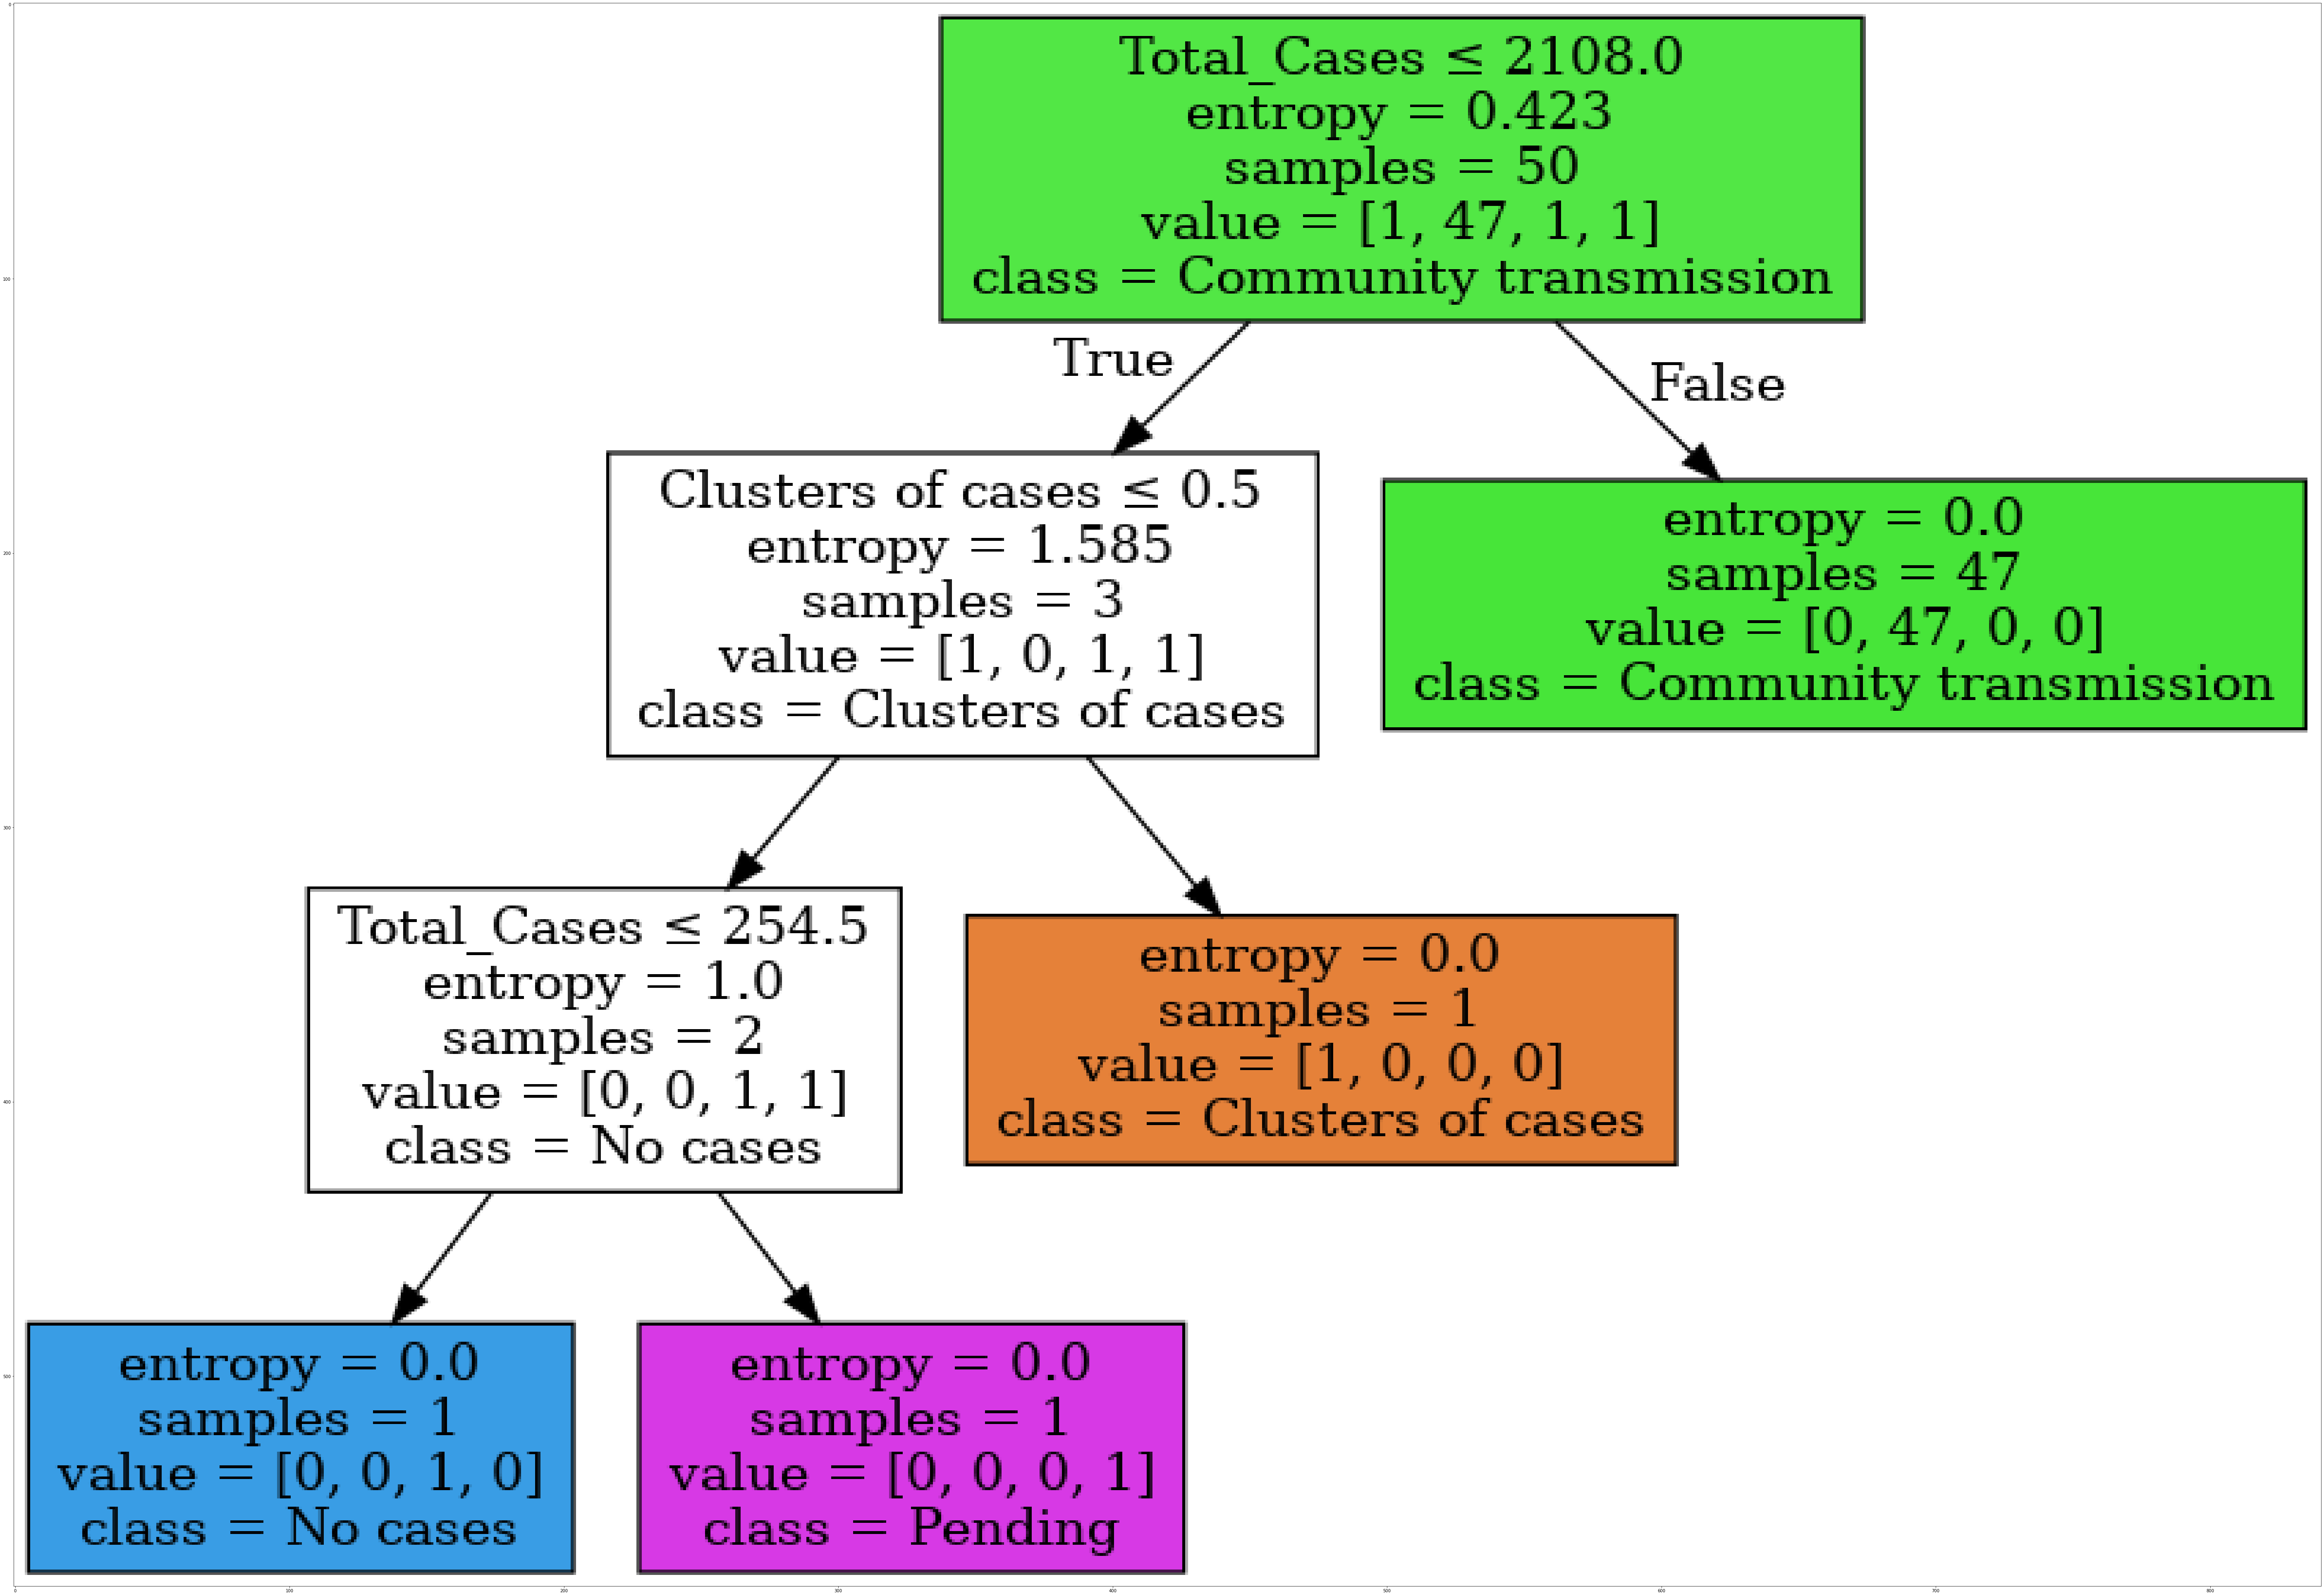

In [53]:
dot_data = StringIO()
filename = "TCtree.png"
featureNames = train_africa.columns
targetNames = africa_df['Transmission_Classification'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [56]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

<h2> Evaluating the Accuracy of Decison Tree Algorithm</h2>

Use Decision Tree object previously trained.

In [57]:
yhat_tree=CovidTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  1.0  F1 is 1.0
                        precision    recall  f1-score   support

     Clusters of cases       1.00      1.00      1.00         1
Community transmission       1.00      1.00      1.00        47
              No cases       1.00      1.00      1.00         1
               Pending       1.00      1.00      1.00         1

              accuracy                           1.00        50
             macro avg       1.00      1.00      1.00        50
          weighted avg       1.00      1.00      1.00        50



array([[ 1,  0,  0,  0],
       [ 0, 47,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

<h2> REMARKS</h2>

<b>The  Accuracy is  1.0 and  F1 is 1.0 </b>::indicating that the Community Transmission mode is the most significance and dangerous modes of transmission of Covid-19 which reqiuire interventions from government.

<h1> End</h1>

By: Sandile Mduduzi Mchunu